In [1]:
import torch
from icl_linear_regression_mup import Transformer, sample
from mup import set_base_shapes
from mup.coord_check import get_coord_data, plot_coord_data
import matplotlib.pyplot as plt

In [2]:
batch_size = 12
block_size = 12

# Base model
base_num_layers = 2
base_embed_dim = 256
base_num_heads = 16

# Delta model
delta_num_layers = 2
delta_embed_dim = 512
delta_num_heads = 16

# Target model
num_layers = 2
embed_dim = 256
num_heads = 16

dropout = 0.1

100%|██████████| 5/5 [00:01<00:00,  3.01it/s]


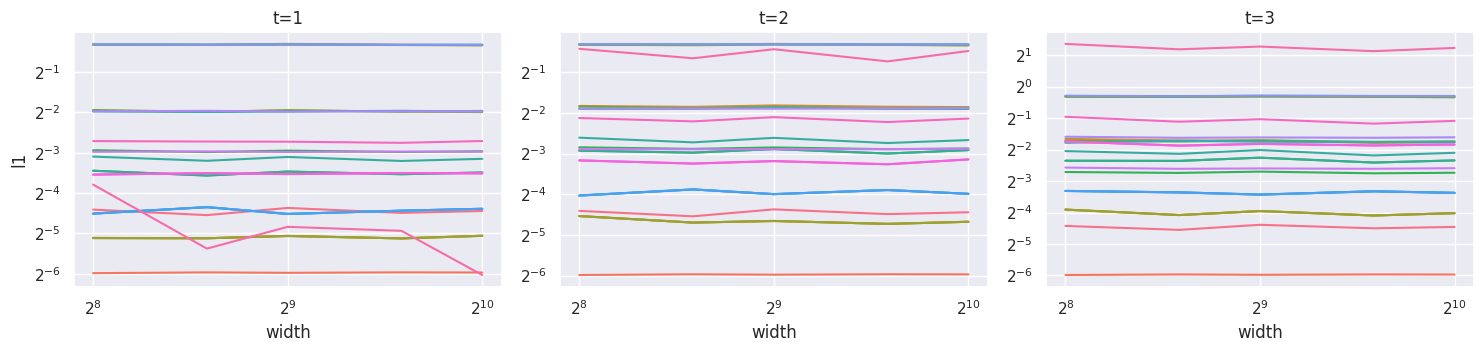

In [3]:
def dataloader(num_samples):
    for _ in range(num_samples):
        samples = sample(batch_size, block_size, (-3, 3), (-5, 5))
        yield (samples[:, :-1], samples[:, 1::2])


def lazy_model(width):
    def instantiate():
        transformer_block_size = 2 * block_size - 1
        base_model = Transformer(
            base_num_layers,
            transformer_block_size,
            base_embed_dim,
            base_num_heads,
            dropout,
        )
        delta_model = Transformer(
            delta_num_layers,
            transformer_block_size,
            delta_embed_dim,
            delta_num_heads,
            dropout,
        )
        model = Transformer(
            num_layers, transformer_block_size, width, num_heads, dropout
        )
        set_base_shapes(model, base_model, delta=delta_model)
        model.init_parameters()
        return model

    return instantiate


models = {
    256: lazy_model(256),
    384: lazy_model(384),
    512: lazy_model(512),
    768: lazy_model(768),
    1024: lazy_model(1024),
}
df = get_coord_data(
    models, iter(dataloader(10)), optimizer="adamw", cuda=torch.cuda.is_available()
)
plot_coord_data(df, legend=False)
plt.show()